In [3]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

In [4]:
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
data1 = pd.read_json('/content/sample_data/Sarcasm_Headlines_Dataset_v2.json', lines=True)
data2 = pd.read_json('/content/sample_data/Sarcasm_Headlines_Dataset.json', lines=True)

In [6]:
data1 = data1[['headline','is_sarcastic']]
data2 = data2[['headline','is_sarcastic']]

data = pd.concat([data1,data2])
data.reset_index(drop=True, inplace=True)

In [7]:
data

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1
...,...,...
55323,american politics in moral free-fall,0
55324,america's best 20 hikes,0
55325,reparations and obama,0
55326,israeli ban targeting boycott supporters raise...,0


In [8]:
data.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

In [10]:
stop_words = stopwords.words('english')
stop_words.remove('not')

def text_cleaning(x):
    
    headline = re.sub('\s+\n+', ' ', x)
    headline = re.sub('[^a-zA-Z0-9]', ' ', x)
    headline = headline.lower()
    headline = headline.split()
    
    headline = [lemm.lemmatize(word, "v") for word in headline if not word in stop_words]
    headline = ' '.join(headline)
    
    return headline

In [12]:
def get_entities(x):
    entity = []
    text = spacy_eng(x)
    for word in text.ents:
        entity.append(word.label_)
    return ",".join(entity)

data['entity'] = data['headline'].progress_apply(get_entities)

100%|██████████| 55328/55328 [05:27<00:00, 168.70it/s]


In [17]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
data['clean_headline'] = data['headline'].apply(text_cleaning)

In [19]:
data['sentence_length'] = data['clean_headline'].apply(lambda x: len(x.split()))
data

,headline,is_sarcastic,entity,clean_headline,sentence_length
0,thirtysomething scientists unveil doomsday clo...,1,DATE,thirtysomething scientists unveil doomsday clo...,7
1,dem rep. totally nails why congress is falling...,0,"ORG,ORG",dem rep totally nail congress fall short gende...,10
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6
3,inclement weather prevents liar from getting t...,1,,inclement weather prevent liar get work,6
4,mother comes pretty close to using word 'strea...,1,,mother come pretty close use word stream corre...,8
...,...,...,...,...,...
55323,american politics in moral free-fall,0,NORP,american politics moral free fall,5
55324,america's best 20 hikes,0,"GPE,CARDINAL",america best 20 hike,4
55325,reparations and obama,0,,reparations obama,2
55326,israeli ban targeting boycott supporters raise...,0,NORP,israeli ban target boycott supporters raise al...,8


In [20]:
data[data['sentence_length']==107]['headline']

12262    hot wheels ranked number one toy for rolling d...
Name: headline, dtype: object

In [21]:
data.drop(data[data['sentence_length'] == 107].index, inplace = True)
data.reset_index(inplace=True, drop=True)

In [22]:
data['contains_number'] = data['clean_headline'].apply(lambda x: bool(re.search(r'\d+', x)))
data

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
0,thirtysomething scientists unveil doomsday clo...,1,DATE,thirtysomething scientists unveil doomsday clo...,7,False
1,dem rep. totally nails why congress is falling...,0,"ORG,ORG",dem rep totally nail congress fall short gende...,10,False
2,eat your veggies: 9 deliciously different recipes,0,CARDINAL,eat veggies 9 deliciously different recipes,6,True
3,inclement weather prevents liar from getting t...,1,,inclement weather prevent liar get work,6,False
4,mother comes pretty close to using word 'strea...,1,,mother come pretty close use word stream corre...,8,False
...,...,...,...,...,...,...
55322,american politics in moral free-fall,0,NORP,american politics moral free fall,5,False
55323,america's best 20 hikes,0,"GPE,CARDINAL",america best 20 hike,4,True
55324,reparations and obama,0,,reparations obama,2,False
55325,israeli ban targeting boycott supporters raise...,0,NORP,israeli ban target boycott supporters raise al...,8,False


In [23]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='DATE')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
32665,remembering that may of 1963,0,DATE,remember may 1963,3,True
34355,"news roundup for march 14, 2017",0,DATE,news roundup march 14 2017,5,True
13130,"news roundup for march 14, 2017",0,DATE,news roundup march 14 2017,5,True
276,aspen ideas festival 2015,0,DATE,aspen ideas festival 2015,4,True
9394,what's new on netflix in january 2016?,0,DATE,new netflix january 2016,4,True
7340,who will win and who should win at the 2015 emmys,0,DATE,win win 2015 emmys,4,True
24788,once upon a festival 2015 is upon us,0,DATE,upon festival 2015 upon us,5,True
30298,breaking: adam got a ps4 for christmas,1,DATE,break adam get ps4 christmas,5,True
48667,"news roundup for july 12, 2017",0,DATE,news roundup july 12 2017,5,True
30506,"after 10 years, here's why i'm over online dating",0,DATE,10 years online date,4,True


In [24]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='TIME')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
39547,man turns vegetarian for 36 hours,1,TIME,man turn vegetarian 36 hours,5,True
1800,quake claims 500 hours,1,TIME,quake claim 500 hours,4,True
55164,email from mom sent at 5:32 a.m.,1,TIME,email mom send 5 32,5,True
47428,5-minute hairstyles -- for real!,0,TIME,5 minute hairstyles real,4,True
7189,oven preheated for 16 seconds,1,TIME,oven preheat 16 second,4,True
31624,"how to be nicer, healthier and more focused in...",0,TIME,nicer healthier focus 15 minutes,5,True
50651,the 1 minute blog. protesters and looting.,0,TIME,1 minute blog protesters loot,5,True
19067,the 1 minute blog. protesters and looting.,0,TIME,1 minute blog protesters loot,5,True
54313,oven preheated for 16 seconds,1,TIME,oven preheat 16 second,4,True
2240,donut shop gets weird after 11 a.m.,1,TIME,donut shop get weird 11,5,True


In [25]:
data[(data['contains_number']) & (data['sentence_length']<=5) & (data['entity']=='CARDINAL')].sample(10)

,headline,is_sarcastic,entity,clean_headline,sentence_length,contains_number
40706,a new 9/11 gift shop,0,CARDINAL,new 9 11 gift shop,5,True
31998,"5 tv episodes that celebrate hanukkah, too",0,CARDINAL,5 tv episodes celebrate hanukkah,5,True
18413,9 signs you're winning at the grandparenting game,0,CARDINAL,9 sign win grandparenting game,5,True
18161,7 ways to breakup like a boss,0,CARDINAL,7 ways breakup like boss,5,True
47050,6 treatable conditions that mimic dementia,0,CARDINAL,6 treatable condition mimic dementia,5,True
54460,how to live to be 110,0,CARDINAL,live 110,2,True
48146,nature's trust (part 1),0,CARDINAL,nature trust part 1,4,True
7407,"what is vidcon? and why did 20,000 teens show up?",0,CARDINAL,vidcon 20 000 teens show,5,True
31408,4 resolutions every runner should make,0,CARDINAL,4 resolutions every runner make,5,True
29766,10 sustainable etsy stores you should support,0,CARDINAL,10 sustainable etsy store support,5,True


In [26]:
sarcastic = data[data['is_sarcastic']==1]['clean_headline'].tolist()
genuine = data[data['is_sarcastic']==0]['clean_headline'].tolist()

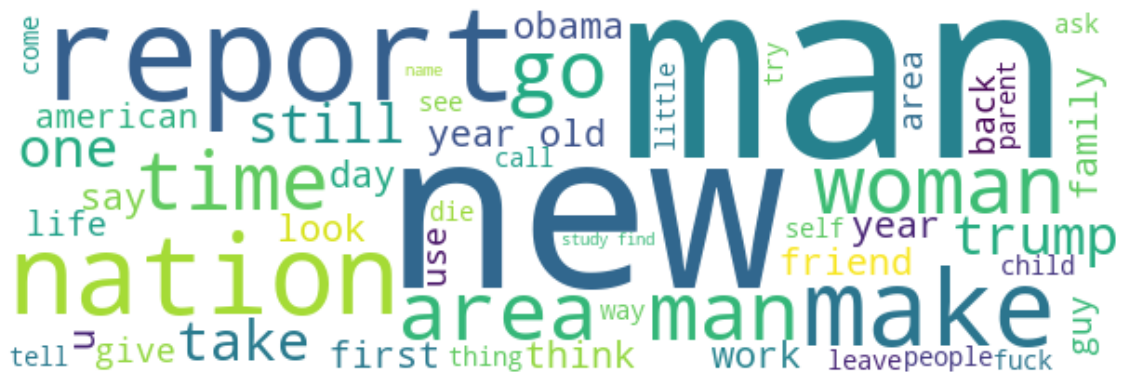

In [27]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(sarcastic))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

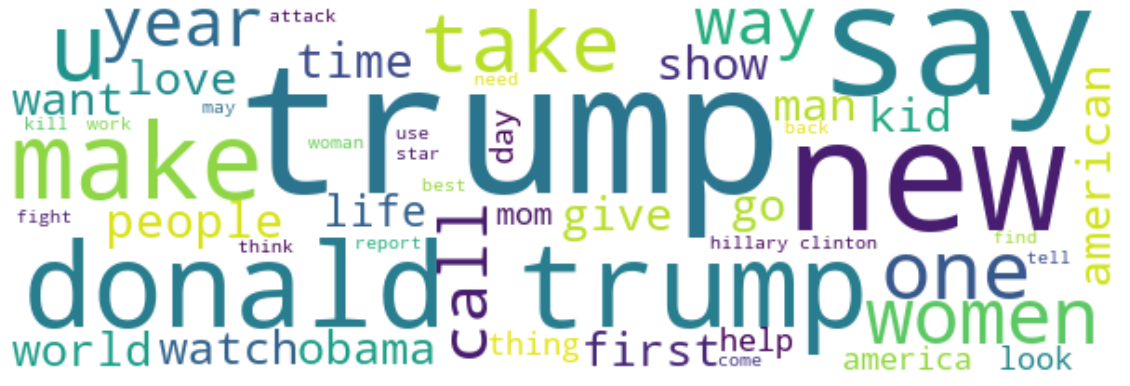

In [28]:
wordcloud = WordCloud(max_words=50, width=600, background_color='white').generate(" ".join(genuine))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [30]:
sentences = data['clean_headline']
label = data['is_sarcastic']

In [31]:
X_train, X_val, y_train, y_val = train_test_split(sentences, label, test_size=0.2, stratify=label, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

In [32]:
max_len = 20       
oov_token = '00_V' 
padding_type = 'post'
trunc_type = 'post'  

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1
print("Vocab Size: ",vocab_size)

Vocab Size:  20875


In [33]:
train_sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(train_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(val_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [34]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim)
        self.ffn = Sequential(
            [layers.Dense(neurons, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)
    
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [35]:
embed_dim = 50  
heads = 2  
neurons = 32
maxlen = 20
vocab_size = 20886

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerEncoder(embed_dim, heads, neurons)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = Dropout(0.35)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = Model(inputs=inputs, outputs=outputs)

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0003), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 token_and_position_embeddin  (None, 20, 50)           1045300   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_encoder (Transf  (None, 20, 50)           23832     
 ormerEncoder)                                                   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 50)                0     

In [37]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.001, patience = 1, verbose = 1)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)

In [38]:
history = model.fit(X_train,y_train,
                    validation_data=(X_val,y_val),
                    epochs=25,
                    batch_size=32,
                    callbacks=[earlystopping])

Epoch 1/25
1384/1384 [==============================] - 14s 7ms/step - loss: 0.4672 - accuracy: 0.7678 - val_loss: 0.3859 - val_accuracy: 0.8326
Epoch 2/25
1384/1384 [==============================] - 9s 7ms/step - loss: 0.2512 - accuracy: 0.9000 - val_loss: 0.3000 - val_accuracy: 0.8861
Epoch 3/25
1384/1384 [==============================] - 9s 7ms/step - loss: 0.1751 - accuracy: 0.9351 - val_loss: 0.2788 - val_accuracy: 0.9067
Epoch 4/25
1384/1384 [==============================] - 10s 7ms/step - loss: 0.1334 - accuracy: 0.9525 - val_loss: 0.2868 - val_accuracy: 0.9161
Epoch 4: early stopping


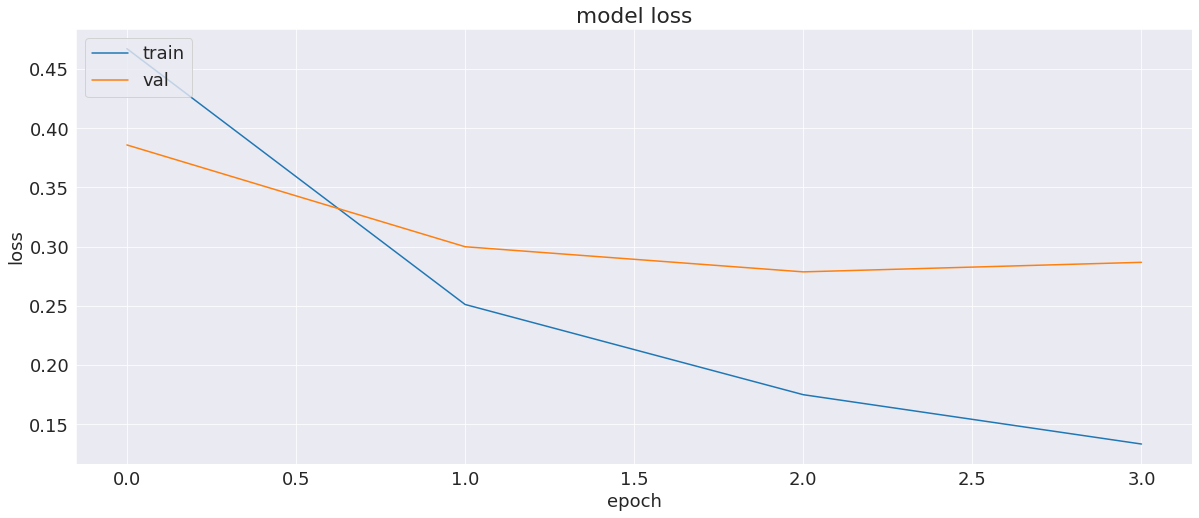

In [39]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

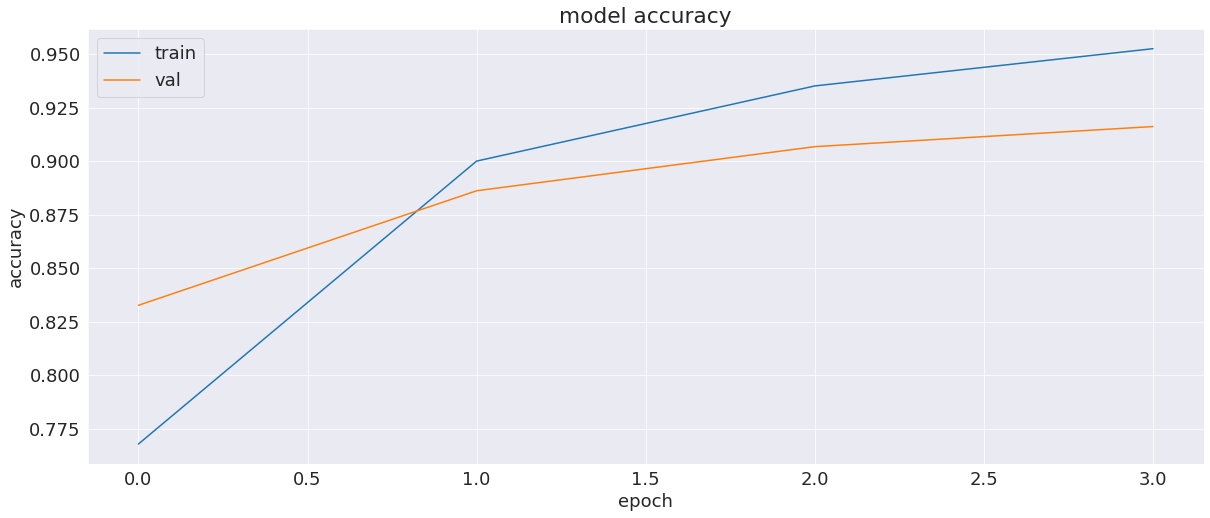

In [40]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

173/173 [==============================] - 1s 5ms/step


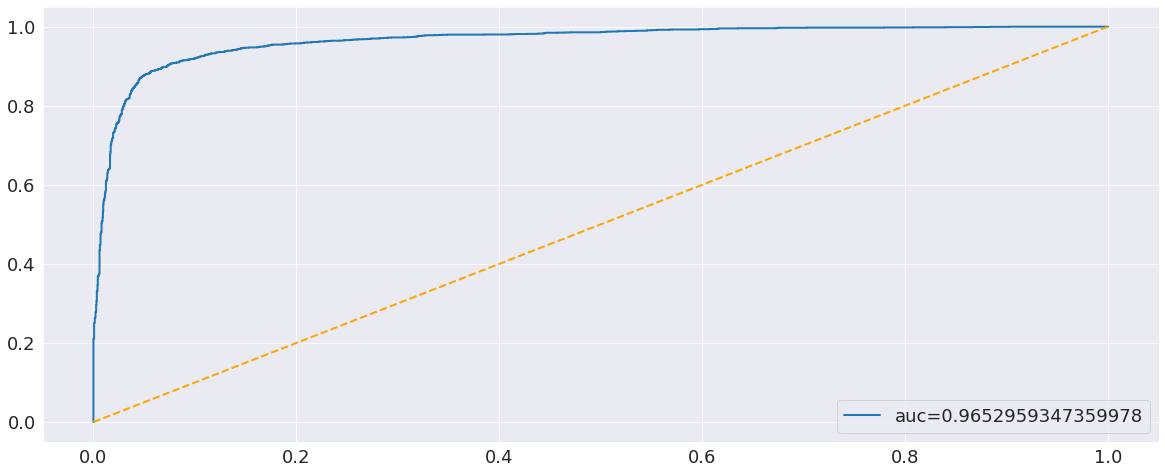

In [42]:
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()

In [43]:
y_pred[y_pred>=0.85] = 1
y_pred[y_pred<0.85] = 0

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2997
           1       0.94      0.85      0.90      2536

    accuracy                           0.91      5533
   macro avg       0.91      0.90      0.91      5533
weighted avg       0.91      0.91      0.91      5533



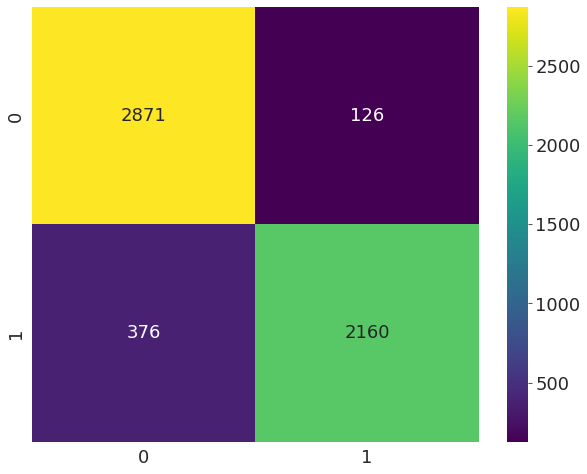

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.4g',cmap='viridis')